In [1]:
import os
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def load_data(file_path):
    data = pd.read_csv(file_path, sep='\t', header=None, names=['filename', 'label'])
    return data

def analyze_dataset(dataset_path):
    train_data = load_data(os.path.join(dataset_path, 'train.tsv'))

    # Number of images
    num_images = len(train_data)
    
    # Distribution of classes
    class_distribution = Counter(train_data['label'])
    
    # Image dimensions and aspect ratios
    image_dimensions = []
    aspect_ratios = []

    for filename in train_data['filename']:
        img_path = os.path.join( '../data/train/', filename)
        with Image.open(img_path) as img:
            width, height = img.size
            image_dimensions.append((width, height))
            aspect_ratios.append(width / height)
    
    # Average image dimensions
    avg_width = np.mean([dim[0] for dim in image_dimensions])
    avg_height = np.mean([dim[1] for dim in image_dimensions])
    
    # Output metrics
    metrics = {
        'num_images': num_images,
        'class_distribution': class_distribution,
        'avg_width': avg_width,
        'avg_height': avg_height,
        'aspect_ratios': aspect_ratios
    }
    
    return metrics

def plot_class_distribution(class_distribution):
    labels, counts = zip(*class_distribution.items())
    plt.figure(figsize=(12, 6))
    plt.bar(labels, counts, color='skyblue')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Class Distribution')
    plt.xticks(rotation=90)
    plt.show()

def plot_aspect_ratios(aspect_ratios):
    plt.figure(figsize=(10, 5))
    plt.hist(aspect_ratios, bins=50, color='skyblue', edgecolor='black')
    plt.xlabel('Aspect Ratio')
    plt.ylabel('Frequency')
    plt.title('Aspect Ratio Distribution')
    plt.show()

dataset_path = '../data'  # Replace with the actual path to your dataset
metrics = analyze_dataset(dataset_path)

print(f"Number of images: {metrics['num_images']}")
print(f"Class distribution: {metrics['class_distribution']}")
print(f"Average width: {metrics['avg_width']}")
print(f"Average height: {metrics['avg_height']}")

plot_class_distribution(metrics['class_distribution'])
plot_aspect_ratios(metrics['aspect_ratios'])

KeyboardInterrupt: 

Number of images: 73830
Class distribution: Counter({'что': 351, 'на': 262, 'если': 226, 'при': 215, 'или': 179, 'для': 165, 'Пусть': 161, 'Если': 149, 'Евгений': 148, 'как': 143, 'по': 141, 'только': 125, 'есть': 119, 'может': 110, 'можно': 99, 'его': 97, 'это': 96, 'не': 93, 'от': 91, 'Теорема': 91, 'быть': 88, 'которые': 88, 'человека': 86, 'часть': 83, 'поле': 79, 'время': 75, 'Рассмотрим': 72, 'Ольга': 70, 'система': 69, 'имеет': 69, 'Тогда': 67, 'части': 66, 'Егор': 66, 'является': 65, 'также': 63, 'Юлия': 63, 'между': 62, 'то': 61, 'число': 60, 'тогда': 59, 'но': 53, 'чтобы': 53, 'так': 52, 'право': 52, 'после': 51, 'оценка': 51, 'человек': 49, 'когда': 49, 'людей': 49, 'жизни': 49, 'Для': 48, 'могут': 48, 'люди': 47, 'которого': 47, 'этом': 46, 'Пример': 45, 'элемент': 45, 'которой': 45, 'точки': 44, 'права': 44, 'области': 44, 'текст': 43, 'котором': 43, 'зависит': 43, 'воинской': 43, 'развития': 42, 'этого': 40, 'всех': 40, 'решение': 40, 'службы': 40, 'их': 39, 'под': 39, 'с

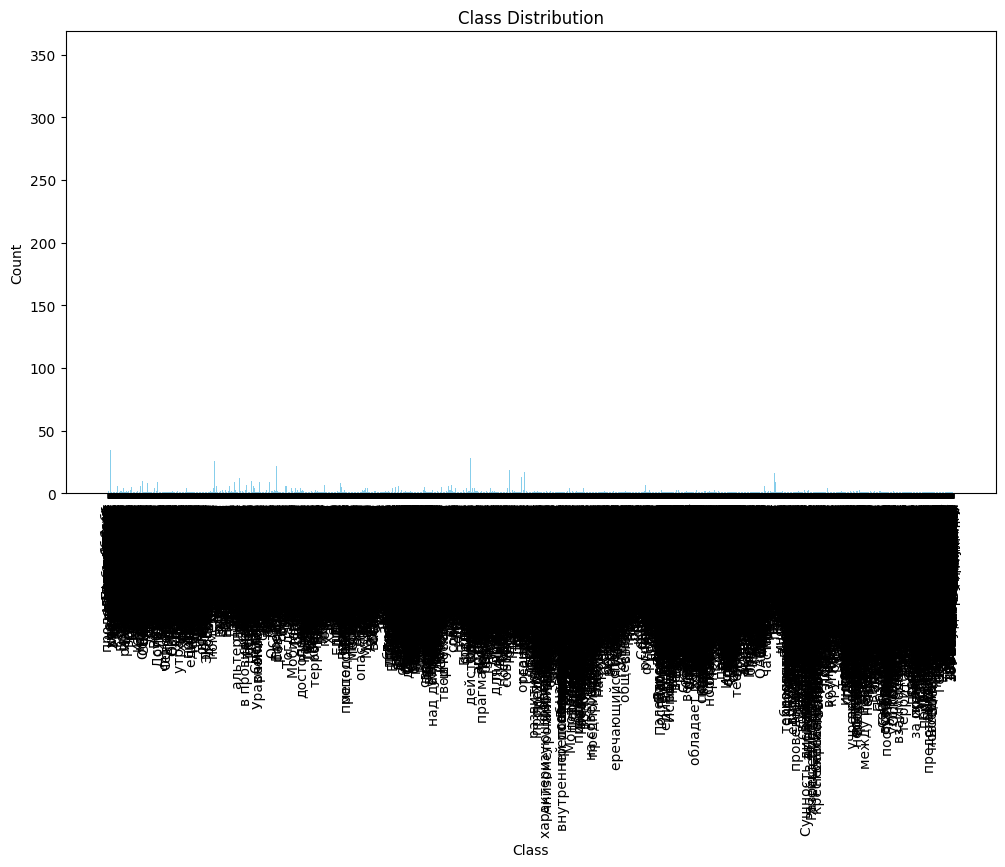

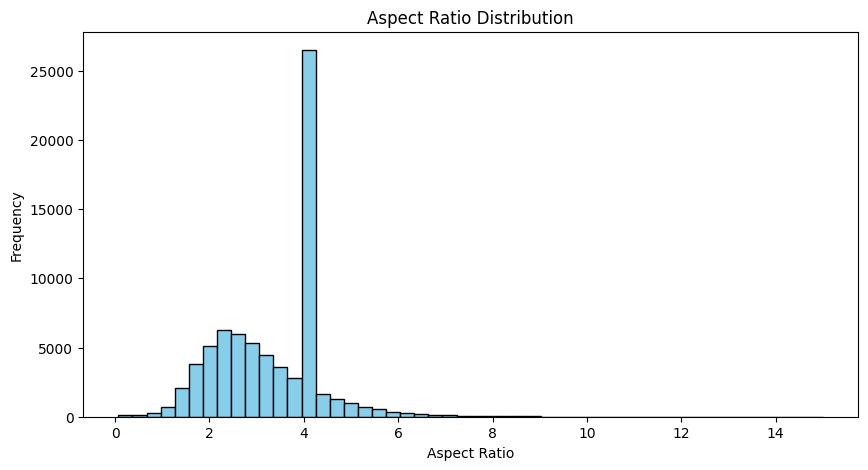

In [13]:
import os
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def load_data(file_path):
    data = pd.read_csv(file_path, sep='\t', header=None, names=['filename', 'label'])
    return data

def analyze_dataset(dataset_path):
    train_data = load_data(os.path.join(dataset_path, 'train.tsv'))
    test_data = load_data(os.path.join(dataset_path, 'test.tsv'))

    all_data = pd.concat([train_data, test_data], axis=0)

    # Number of images
    num_images = len(all_data)
    
    # Distribution of classes
    class_distribution = Counter(all_data['label'])
    
    # Image dimensions and aspect ratios
    image_dimensions = []
    aspect_ratios = []

    for _, row in all_data.iterrows():
        filename = row['filename']
        label = row['label']
        
        img_path_train = os.path.join('../data/train/', filename)
        img_path_test = os.path.join('../data/test/', filename)
        
        if os.path.exists(img_path_train):
            img_path = img_path_train
        elif os.path.exists(img_path_test):
            img_path = img_path_test
        else:
            print(f"File not found: {filename}")
            continue
        
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_dimensions.append((width, height))
                aspect_ratios.append(width / height)
        except Exception as e:
            print(f"Error opening file {filename}: {e}")
            continue
    
    # Average image dimensions
    avg_width = np.mean([dim[0] for dim in image_dimensions])
    avg_height = np.mean([dim[1] for dim in image_dimensions])
    
    # Output metrics
    metrics = {
        'num_images': num_images,
        'class_distribution': class_distribution,
        'avg_width': avg_width,
        'avg_height': avg_height,
        'aspect_ratios': aspect_ratios
    }
    
    return metrics

def plot_class_distribution(class_distribution):
    labels, counts = zip(*class_distribution.items())
    labels = [str(label) for label in labels]  # Ensure all labels are strings
    plt.figure(figsize=(12, 6))
    plt.bar(labels, counts, color='skyblue')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Class Distribution')
    plt.xticks(rotation=90)
    plt.show()

def plot_aspect_ratios(aspect_ratios):
    plt.figure(figsize=(10, 5))
    plt.hist(aspect_ratios, bins=50, color='skyblue', edgecolor='black')
    plt.xlabel('Aspect Ratio')
    plt.ylabel('Frequency')
    plt.title('Aspect Ratio Distribution')
    plt.show()

dataset_path = '../data'  # Replace with the actual path to your dataset
metrics = analyze_dataset(dataset_path)

print(f"Number of images: {metrics['num_images']}")
print(f"Class distribution: {metrics['class_distribution']}")
print(f"Average width: {metrics['avg_width']}")
print(f"Average height: {metrics['avg_height']}")

plot_class_distribution(metrics['class_distribution'])
plot_aspect_ratios(metrics['aspect_ratios'])


Number of images: 73830
Class distribution: Counter({'что': 351, 'на': 262, 'если': 226, 'при': 215, 'или': 179, 'для': 165, 'Пусть': 161, 'Если': 149, 'Евгений': 148, 'как': 143, 'по': 141, 'только': 125, 'есть': 119, 'может': 110, 'можно': 99, 'его': 97, 'это': 96, 'не': 93, 'от': 91, 'Теорема': 91, 'быть': 88, 'которые': 88, 'человека': 86, 'часть': 83, 'поле': 79, 'время': 75, 'Рассмотрим': 72, 'Ольга': 70, 'система': 69, 'имеет': 69, 'Тогда': 67, 'части': 66, 'Егор': 66, 'является': 65, 'также': 63, 'Юлия': 63, 'между': 62, 'то': 61, 'число': 60, 'тогда': 59, 'но': 53, 'чтобы': 53, 'так': 52, 'право': 52, 'после': 51, 'оценка': 51, 'человек': 49, 'когда': 49, 'людей': 49, 'жизни': 49, 'Для': 48, 'могут': 48, 'люди': 47, 'которого': 47, 'этом': 46, 'Пример': 45, 'элемент': 45, 'которой': 45, 'точки': 44, 'права': 44, 'области': 44, 'текст': 43, 'котором': 43, 'зависит': 43, 'воинской': 43, 'развития': 42, 'этого': 40, 'всех': 40, 'решение': 40, 'службы': 40, 'их': 39, 'под': 39, 'с

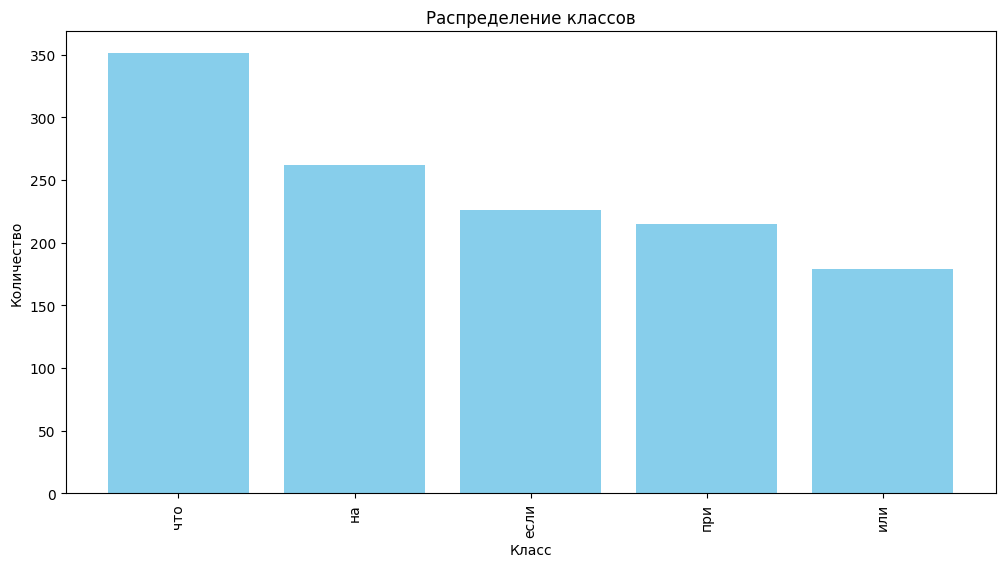

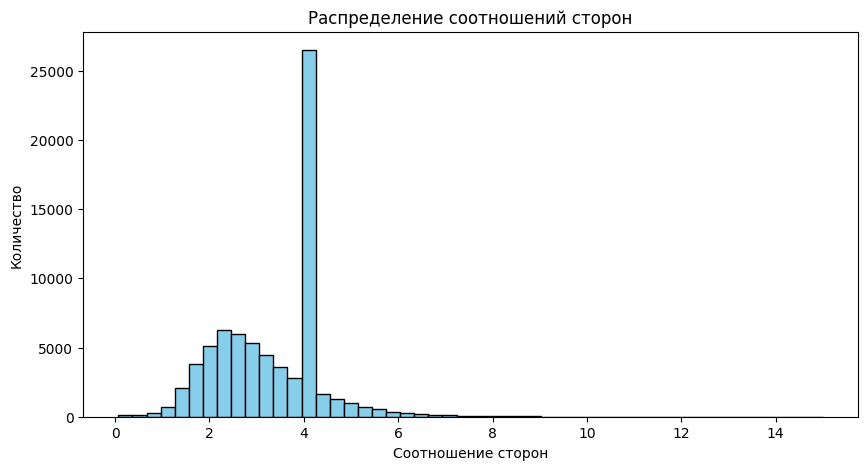

In [23]:
import os
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def load_data(file_path):
    data = pd.read_csv(file_path, sep='\t', header=None, names=['filename', 'label'])
    return data

def analyze_dataset(dataset_path):
    train_data = load_data(os.path.join(dataset_path, 'train.tsv'))
    test_data = load_data(os.path.join(dataset_path, 'test.tsv'))

    all_data = pd.concat([train_data, test_data], axis=0)

    # Number of images
    num_images = len(all_data)
    
    # Distribution of classes
    class_distribution = Counter(all_data['label'])
    
    # Image dimensions and aspect ratios
    image_dimensions = []
    aspect_ratios = []
    file_extensions = []

    for _, row in all_data.iterrows():
        filename = row['filename']
        label = row['label']
        
        img_path_train = os.path.join('../data/train/', filename)
        img_path_test = os.path.join('../data/test/', filename)
        
        if os.path.exists(img_path_train):
            img_path = img_path_train
        elif os.path.exists(img_path_test):
            img_path = img_path_test
        else:
            print(f"File not found: {filename}")
            continue
        
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_dimensions.append((width, height))
                aspect_ratios.append(width / height)
                file_extensions.append(os.path.splitext(filename)[1].lower())
        except Exception as e:
            print(f"Error opening file {filename}: {e}")
            continue
    
    # Average image dimensions
    avg_width = np.mean([dim[0] for dim in image_dimensions])
    avg_height = np.mean([dim[1] for dim in image_dimensions])
    
    # File extension distribution
    extension_distribution = Counter(file_extensions)
    
    # Output metrics
    metrics = {
        'num_images': num_images,
        'class_distribution': class_distribution,
        'avg_width': avg_width,
        'avg_height': avg_height,
        'aspect_ratios': aspect_ratios,
        'extension_distribution': extension_distribution
    }
    
    return metrics

def plot_class_distribution(class_distribution):
    top_classes = class_distribution.most_common(5)
    labels, counts = zip(*top_classes)
    labels = [str(label) for label in labels]  # Ensure all labels are strings
    plt.figure(figsize=(12, 6))
    plt.bar(labels, counts, color='skyblue')
    plt.xlabel('Класс')
    plt.ylabel('Количество')
    plt.title('Распределение классов')
    plt.xticks(rotation=90)
    plt.show()

def plot_aspect_ratios(aspect_ratios):
    plt.figure(figsize=(10, 5))
    plt.hist(aspect_ratios, bins=50, color='skyblue', edgecolor='black')
    plt.xlabel('Соотношение сторон')
    plt.ylabel('Количество')
    plt.title('Распределение соотношений сторон')
    plt.show()

def plot_extension_distribution(extension_distribution):
    extensions, counts = zip(*extension_distribution.items())
    plt.figure(figsize=(10, 5))
    plt.bar(extensions, counts, color='skyblue')
    plt.xlabel('File Extension')
    plt.ylabel('Count')
    plt.title('File Extension Distribution')
    plt.show()

dataset_path = '../data'  # Replace with the actual path to your dataset
metrics = analyze_dataset(dataset_path)

print(f"Number of images: {metrics['num_images']}")
print(f"Class distribution: {metrics['class_distribution']}")
print(f"Average width: {metrics['avg_width']}")
print(f"Average height: {metrics['avg_height']}")
print(f"File extension distribution: {metrics['extension_distribution']}")

plot_class_distribution(metrics['class_distribution'])
plot_aspect_ratios(metrics['aspect_ratios'])


In [14]:
len(metrics['class_distribution'])

37495

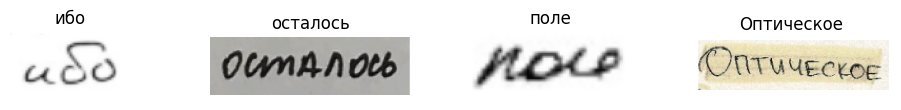

In [2]:
def visualize(dataset_path, arr):
    plt.figure(figsize=(15, 3))
    for i in range(4):
        plt.subplot(3, 5, i+1)
        all_images = os.listdir(f"{dataset_path}/train")
        image = plt.imread(f"{dataset_path}/train/{all_images[i]}")
        plt.imshow(image)
        plt.axis('off')
        plt.title(arr[i])
    plt.show()
A = ['ибо', 'осталось', 'поле', 'Оптическое', '1 класса']
PATH = '../showdata'
visualize(PATH, A)

Number of images: 73830
Class distribution: Counter({'что': 351, 'на': 262, 'если': 226, 'при': 215, 'или': 179, 'для': 165, 'Пусть': 161, 'Если': 149, 'Евгений': 148, 'как': 143, 'по': 141, 'только': 125, 'есть': 119, 'может': 110, 'можно': 99, 'его': 97, 'это': 96, 'не': 93, 'от': 91, 'Теорема': 91, 'быть': 88, 'которые': 88, 'человека': 86, 'часть': 83, 'поле': 79, 'время': 75, 'Рассмотрим': 72, 'Ольга': 70, 'система': 69, 'имеет': 69, 'Тогда': 67, 'части': 66, 'Егор': 66, 'является': 65, 'также': 63, 'Юлия': 63, 'между': 62, 'то': 61, 'число': 60, 'тогда': 59, 'но': 53, 'чтобы': 53, 'так': 52, 'право': 52, 'после': 51, 'оценка': 51, 'человек': 49, 'когда': 49, 'людей': 49, 'жизни': 49, 'Для': 48, 'могут': 48, 'люди': 47, 'которого': 47, 'этом': 46, 'Пример': 45, 'элемент': 45, 'которой': 45, 'точки': 44, 'права': 44, 'области': 44, 'текст': 43, 'котором': 43, 'зависит': 43, 'воинской': 43, 'развития': 42, 'этого': 40, 'всех': 40, 'решение': 40, 'службы': 40, 'их': 39, 'под': 39, 'с

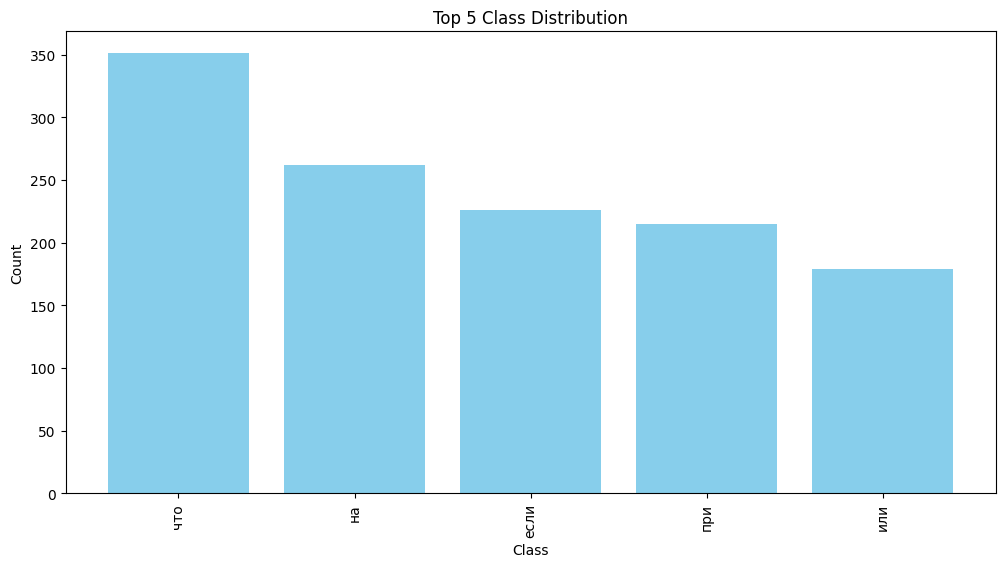

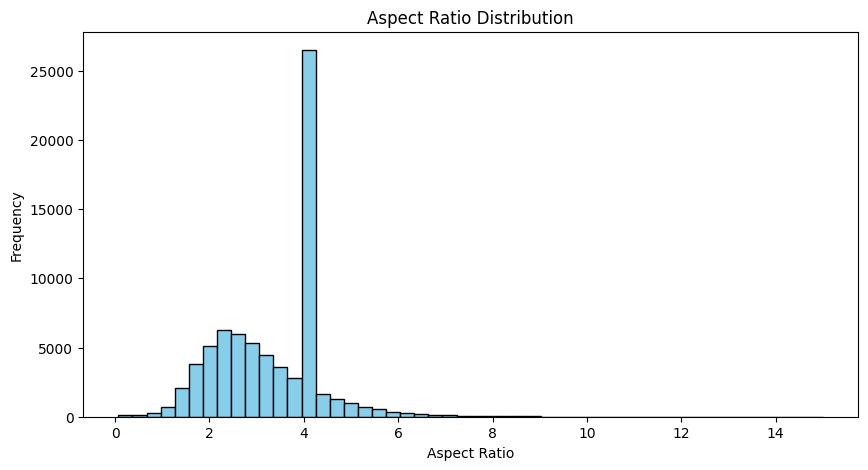

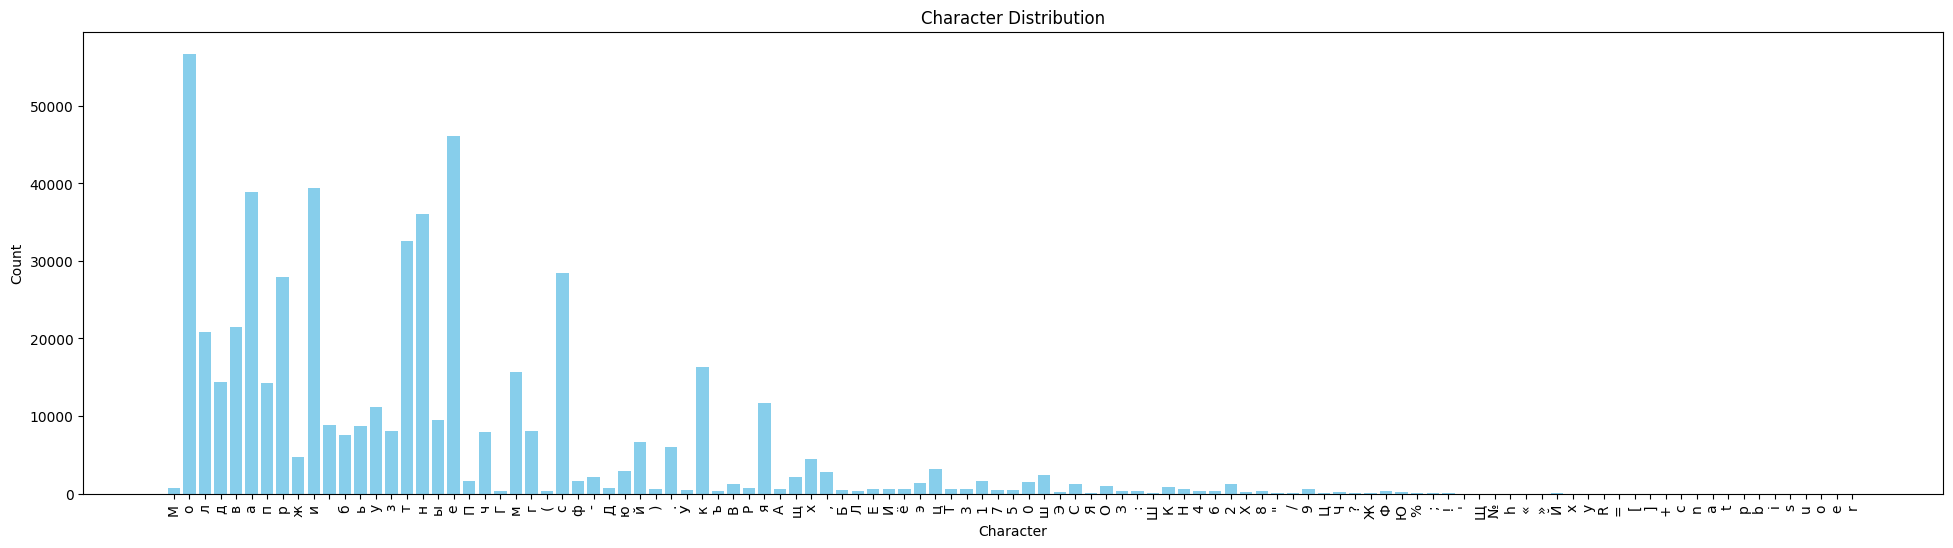

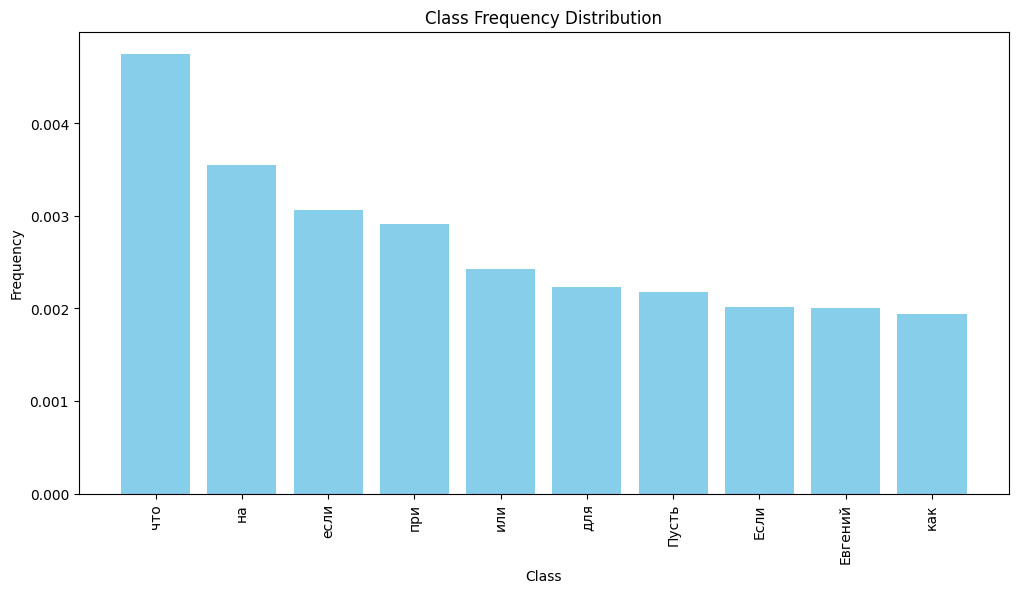

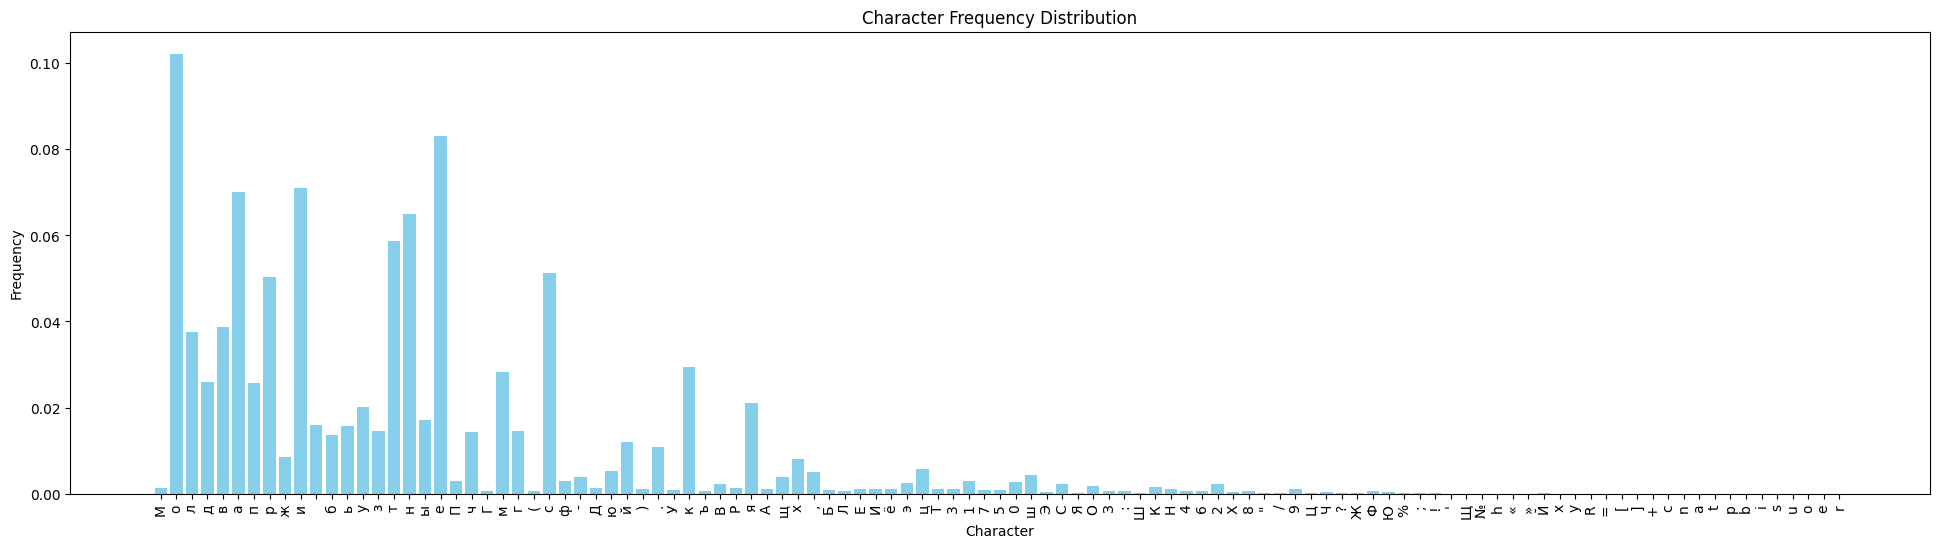

In [13]:
import os
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def load_data(file_path):
    data = pd.read_csv(file_path, sep='\t', header=None, names=['filename', 'label'])
    return data

def analyze_dataset(dataset_path):
    train_data = load_data(os.path.join(dataset_path, 'train.tsv'))
    test_data = load_data(os.path.join(dataset_path, 'test.tsv'))

    all_data = pd.concat([train_data, test_data], axis=0)

    # Ensure all labels are strings
    all_data['label'] = all_data['label'].astype(str)

    # Number of images
    num_images = len(all_data)
    
    # Distribution of classes
    class_distribution = Counter(all_data['label'])
    
    # Frequency distribution of classes
    total_labels = sum(class_distribution.values())
    class_freq_distribution = {label: count / total_labels for label, count in class_distribution.items()}
    
    # Distribution of characters
    all_chars = ''.join(all_data['label'])
    char_distribution = Counter(all_chars)
    
    # Frequency distribution of characters
    total_chars = sum(char_distribution.values())
    char_freq_distribution = {char: count / total_chars for char, count in char_distribution.items()}
    
    
    # Image dimensions and aspect ratios
    image_dimensions = []
    aspect_ratios = []
    file_extensions = []
    expression_lengths = []

    for _, row in all_data.iterrows():
        filename = row['filename']
        label = row['label']
        expression_lengths.append(len(label))
        
        img_path_train = os.path.join('../data/train', filename)
        img_path_test = os.path.join('../data/test', filename)
        
        if os.path.exists(img_path_train):
            img_path = img_path_train
        elif os.path.exists(img_path_test):
            img_path = img_path_test
        else:
            print(f"File not found: {filename}")
            continue
        
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_dimensions.append((width, height))
                aspect_ratios.append(width / height)
                file_extensions.append(os.path.splitext(filename)[1].lower())
        except Exception as e:
            print(f"Error opening file {filename}: {e}")
            continue
    
    # Average image dimensions
    avg_width = np.mean([dim[0] for dim in image_dimensions])
    avg_height = np.mean([dim[1] for dim in image_dimensions])
    std_width = np.std([dim[0] for dim in image_dimensions])
    std_height = np.std([dim[1] for dim in image_dimensions])
    # Standard deviation of aspect ratios
    std_aspect_ratios = np.std(aspect_ratios)
    
    
    avg_expression_lengths = np.mean(expression_lengths)
    # Standard deviation of expression lengths
    std_expression_length = np.std(expression_lengths)
    
    # File extension distribution
    extension_distribution = Counter(file_extensions)
    
    
    # Output metrics
    metrics = {
        'num_images': num_images,
        'class_distribution': class_distribution,
        'class_freq_distribution': class_freq_distribution,
        'char_distribution': char_distribution,
        'char_freq_distribution': char_freq_distribution,
        'avg_width': avg_width,
        'avg_height': avg_height,
        'std_width': std_width,
        'std_height': std_height,
        'std_aspect_ratios': std_aspect_ratios,
        'aspect_ratios': aspect_ratios,
        'extension_distribution': extension_distribution,
        'avg_expression_length': avg_expression_lengths,
        'max_length_expression': max(expression_lengths),
        'std_expression_length': std_expression_length,
        'least_common_class': class_distribution.most_common()[-1],
        'most_common_char': char_distribution.most_common(1)[0],
        'least_common_char': char_distribution.most_common()[-1]
    }
    return metrics

def plot_class_distribution(class_distribution):
    # Get the top 5 classes
    top_classes = class_distribution.most_common(5)
    labels, counts = zip(*top_classes)
    labels = [str(label) for label in labels]  # Ensure all labels are strings
    plt.figure(figsize=(12, 6))
    plt.bar(labels, counts, color='skyblue')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Top 5 Class Distribution')
    plt.xticks(rotation=90)
    plt.show()

def plot_class_freq_distribution(class_freq_distribution):
    top_classes = sorted(class_freq_distribution.items(), key=lambda item: item[1], reverse=True)[:10]
    labels, freqs = zip(*top_classes)
    labels = [str(label) for label in labels]  # Ensure all labels are strings
    plt.figure(figsize=(12, 6))
    plt.bar(labels, freqs, color='skyblue')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title('Class Frequency Distribution')
    plt.xticks(rotation=90)
    plt.show()

def plot_aspect_ratios(aspect_ratios):
    plt.figure(figsize=(10, 5))
    plt.hist(aspect_ratios, bins=50, color='skyblue', edgecolor='black')
    plt.xlabel('Aspect Ratio')
    plt.ylabel('Frequency')
    plt.title('Aspect Ratio Distribution')
    plt.show()

def plot_extension_distribution(extension_distribution):
    extensions, counts = zip(*extension_distribution.items())
    plt.figure(figsize=(10, 5))
    plt.bar(extensions, counts, color='skyblue')
    plt.xlabel('File Extension')
    plt.ylabel('Count')
    plt.title('File Extension Distribution')
    plt.show()

def plot_char_distribution(char_distribution):
    chars, counts = zip(*char_distribution.items())
    chars = [str(char) for char in chars]  # Ensure all chars are strings
    plt.figure(figsize=(24, 6))
    plt.bar(chars, counts, color='skyblue')
    plt.xlabel('Character')
    plt.ylabel('Count')
    plt.title('Character Distribution')
    plt.xticks(rotation=90)
    plt.show()

def plot_char_freq_distribution(char_freq_distribution):
    chars, freqs = zip(*char_freq_distribution.items())
    chars = [str(char) for char in chars]  # Ensure all chars are strings
    plt.figure(figsize=(24, 6))
    plt.bar(chars, freqs, color='skyblue')
    plt.xlabel('Character')
    plt.ylabel('Frequency')
    plt.title('Character Frequency Distribution')
    plt.xticks(rotation=90)
    plt.show()

dataset_path = '../data'  # Replace with the actual path to your dataset
metrics = analyze_dataset(dataset_path)

print(f"Number of images: {metrics['num_images']}")
print(f"Class distribution: {metrics['class_distribution']}")
print(f"Class frequency distribution: {metrics['class_freq_distribution']}")
print(f"Most common char: {metrics['most_common_char']}")
print(f"Least common char: {metrics['least_common_char']}")
print(f"Least common class: {metrics['least_common_class']}")
print(f"Average length of expression: {metrics['avg_expression_length']}")
print(f"Max length of expression: {metrics['max_length_expression']}")
print(f"Standard deviation of expression length: {metrics['std_expression_length']}")
print(f"Average width: {metrics['avg_width']}")
print(f"Average height: {metrics['avg_height']}")
print(f"Standard deviation of width: {metrics['std_width']}")
print(f"Standard deviation of height: {metrics['std_height']}")
print(f"Standard deviation of aspect ratios: {metrics['std_aspect_ratios']}")
print(f"File extension distribution: {metrics['extension_distribution']}")
print(f"Character frequency distribution: {metrics['char_freq_distribution']}")

plot_class_distribution(metrics['class_distribution'])
plot_aspect_ratios(metrics['aspect_ratios'])
plot_char_distribution(metrics['char_distribution'])
plot_class_freq_distribution(metrics['class_freq_distribution'])
plot_char_freq_distribution(metrics['char_freq_distribution'])



In [14]:
len(metrics['char_distribution'])

109

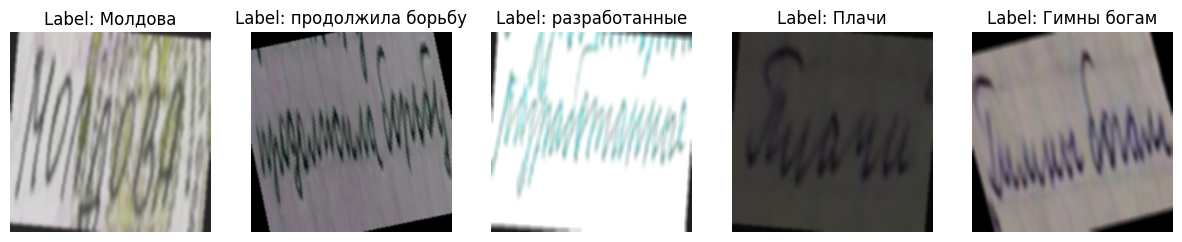

In [22]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.transforms.functional import to_pil_image

# Define the transforms
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=.5, contrast=.5, saturation=.5, hue=.3),
    transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
    transforms.ToTensor()
])

def load_data(file_path):
    data = pd.read_csv(file_path, sep='\t', header=None, names=['filename', 'label'])
    return data

def apply_transforms_and_show(dataset_path, num_samples=5):
    train_data = load_data(os.path.join(dataset_path, 'train.tsv'))

    sampled_images = []
    sampled_labels = []

    for _, row in train_data.iterrows():
        filename = row['filename']
        label = row['label']
        
        img_path = os.path.join('../data/train', filename)
        
        if os.path.exists(img_path):
            try:
                with Image.open(img_path) as img:
                    transformed_img = train_transforms(img)
                    sampled_images.append(transformed_img)
                    sampled_labels.append(label)
                    
                    if len(sampled_images) >= num_samples:
                        break
            except Exception as e:
                print(f"Error opening file {filename}: {e}")
                continue

    # Display the transformed images
    plt.figure(figsize=(15, 10))
    for i in range(len(sampled_images)):
        plt.subplot(3, 5, i+1)
        img = sampled_images[i]
        label = sampled_labels[i]
        plt.imshow(to_pil_image(img))
        plt.title(f"Label: {label}")
        plt.axis('off')
    plt.show()

dataset_path = '../data'  # Replace with the actual path to your dataset
apply_transforms_and_show(dataset_path, num_samples=5)

